In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

In [2]:
data10 = np.loadtxt("MarcheAlex.txt")

In [3]:
min_G = data10[0,0]
min_D = data10[0,1]
for i in range(data10.shape[0]):
    data10[i,0] = data10[i,0]-min_G
    data10[i,1] = data10[i,1]-min_D

In [4]:
data11 = np.loadtxt("CourseAlex.txt")

In [5]:
min_G = data11[0,0]
min_D = data11[0,1]
for i in range(data11.shape[0]):
    data11[i,0] = data11[i,0]-min_G
    data11[i,1] = data11[i,1]-min_D

In [6]:
data = np.loadtxt("Marche.txt")

In [7]:
min_G = data[0,1]
min_D = data[0,2]
for i in range(data.shape[0]):
    data[i,1] = data[i,1]-min_G
    data[i,2] = data[i,2]-min_D

In [8]:
print(data)

[[ 1.000e-02  0.000e+00  0.000e+00]
 [ 5.000e-02  2.000e+00 -2.000e+00]
 [ 9.000e-02  2.000e+00 -2.000e+00]
 ...
 [ 2.729e+01 -2.000e+00 -3.500e+01]
 [ 2.733e+01  6.000e+00 -7.300e+01]
 [ 2.737e+01 -7.000e+00 -7.000e+01]]


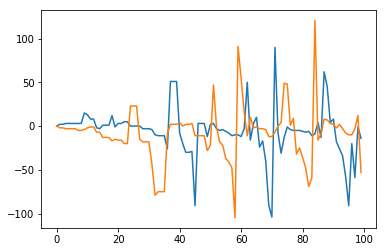

In [9]:
plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.show()

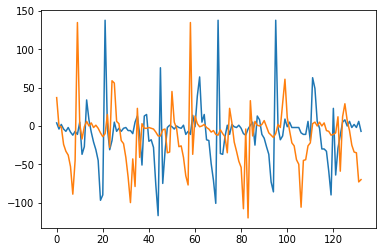

In [10]:
plt.plot(data[550:,1])
plt.plot(data[550:,2])
plt.show()

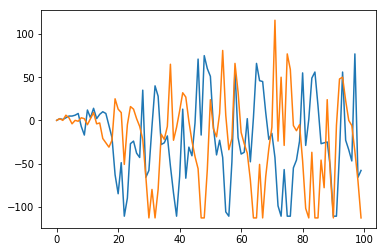

In [11]:
data2 = np.loadtxt("Course.txt")
min_G = data2[0,1]
min_D = data2[0,2]
for i in range(data2.shape[0]):
    data2[i,1] = data2[i,1]-min_G
    data2[i,2] = data2[i,2]-min_D
plt.plot(data2[:100,1])
plt.plot(data2[:100,2])
plt.show()

In [12]:
####Fonction de lissage
def lissage(Ly,p):
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lyout=[]
    for i in range(p,Ly.shape[0]-p):
        val=0
        for k in range(2*p):
            val+=Ly[i-p+k]
        Lyout.append(val/2/p)
    Lyout.append(0)
    Lyout.append(0) 
    return Lyout

In [13]:
def lissage_2(data):
    liste = []
    liste.append(data[0])
    for i in range(1,data.shape[0]-1):
        if (data[i+1]-data[i-1]>0 and data[i+1]-data[i]>0) or (data[i+1]-data[i-1]<0 and data[i+1]-data[i]<0):
            liste.append(data[i])
        else:
            liste.append((data[i+1]+data[i-1])/2)
    
    liste.append(data[data.shape[0]-1])
    buff = np.array(liste)
    return buff

In [14]:
def compute_by_diff(data,diff,i,j,size,liste):
    var1=0
    var2=0
    var3=0
    data4 = []
    data3 = []
    data5 = np.zeros((size), dtype='i')
    data6 = np.zeros((size), dtype='i')
    fin = False
    l=0
    for k in range(1,data.shape[0]):
        if diff[k-1]<0 and diff[k]>0 and var2==0:
            var1=1
        if diff[k-1]>0 and diff[k]<0 and var1==0:
            var2=1
            
        if var1==1:
            m = k
            while fin == False:
                data4.append(data[m,i])
                data3.append(data[m,j])
                if m == data.shape[0]-1:
                    var1 = 0
                    var3 = 0
                    fin = True
                    data4 = []
                    data3 = []
                if diff[m-1]<0 and diff[m]>0 and var3 == 1:
                    if m-k > size:
                        var1 = 0
                        var3 = 0
                        fin = True
                        data4 = []
                        data3 = []
                    else:
                        for l in range(len(data3)):
                            data5[l] = data3[l]
                        for l in range(len(data4)):
                            data6[l] = data3[l]
                        data3 = data5.tolist()
                        data4 = data6.tolist()
                        for l in range(len(data3)):
                            data4.append(data3[l])
                        buff = np.array(data4)
                        buff = np.resize(buff,(size))
                        data4 = buff.tolist()
                        data4.append(0)
                        buff = np.array(data4)
                        liste.append(buff)
                        data3 = []
                        data4 = []
                        var1 = 0
                        var3 = 0
                        data5 = np.zeros((size), dtype='i')
                        data6 = np.zeros((size), dtype='i')
                        fin = True
                if var1 == 1:
                    var3 = 1
                m = m+1
            fin = False
                
        if var2==1:
            m = k
            while fin == False: 
                data4.append(data[m,i])
                data3.append(data[m,j])
                if m == data.shape[0]-1:
                    var1 = 0
                    var3 = 0
                    fin = True
                    data4 = []
                    data3 = []
                if diff[m-1]>0 and diff[m]<0 and var3 == 1:
                    if m-k > size:
                        var1 = 0
                        var3 = 0
                        fin = True
                        data4 = []
                        data3 = []
                    else:
                        for l in range(len(data3)):
                            data5[l] = data3[l]
                        for l in range(len(data4)):
                            data6[l] = data3[l]
                        data3 = data5.tolist()
                        data4 = data6.tolist()
                        for l in range(len(data3)):
                            data4.append(data3[l])
                        buff = np.array(data4)
                        buff = np.resize(buff,(size))
                        data4 = buff.tolist()
                        data4.append(1)
                        buff = np.array(data4)
                        liste.append(buff)
                        data3 = []
                        data4 = []
                        var2 = 0
                        var3 = 0
                        data5 = np.zeros((size), dtype='i')
                        data6 = np.zeros((size), dtype='i')
                        fin = True
                if var2 == 1:
                    var3 = 1
                m = m+1
            fin = False
                
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)
            

In [15]:
def delta_data(data):
    liste = []
    for i in range(1,data.shape[0]):
        if data[i]-data[i-1]>0 and data[i]>0:
            liste.append(1)
        elif data[i]-data[i-1]<0 and data[i]>0:
            liste.append(-1)
        elif data[i]-data[i-1]>0 and data[i]<0:
            liste.append(2)
        elif data[i]-data[i-1]<0 and data[i]<0:
            liste.append(-2)
        else:
            liste.append(0)
    liste.append(0)
    buff = np.array(liste)
    return buff

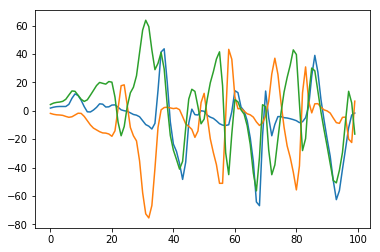

[[ 1.000e-02  1.875e+00 -1.875e+00]
 [ 5.000e-02  2.500e+00 -2.500e+00]
 [ 9.000e-02  2.875e+00 -2.875e+00]
 ...
 [ 2.729e+01  5.000e-01 -1.350e+01]
 [ 2.733e+01  0.000e+00  0.000e+00]
 [ 2.737e+01  0.000e+00  0.000e+00]]


In [16]:
buff = data[:,1]
buff = lissage(buff,1)
data[:,1]=np.array(lissage(np.array(lissage(np.array(buff),1)),1))
buff = data[:,2]
buff = lissage(buff,1)
data[:,2]=np.array(lissage(np.array(lissage(np.array(buff),1)),1))
diff1 = data[:,1]-data[:,2]
diff1 = np.array(lissage(diff1,1))
plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.plot(diff1[:100])
plt.show()
print(data)

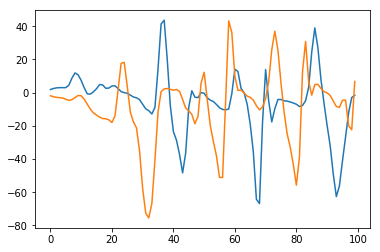

In [17]:
#data[:,1]=delta_data(data[:,1])
#data[:,2]=delta_data(data[:,2])
plt.plot(data[:100,1])
plt.plot(data[:100,2])
plt.show()

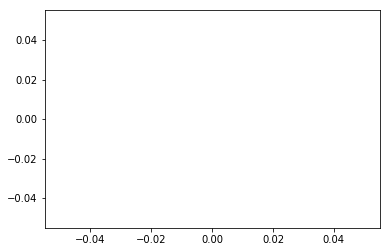

[[ 2.0000e-02  1.2500e+00  1.0000e+00]
 [ 6.0000e-02  1.7500e+00  2.0000e+00]
 [ 1.0000e-01  3.0000e+00  3.7500e+00]
 [ 1.4000e-01  4.5000e+00  2.0000e+00]
 [ 1.8000e-01  5.2500e+00 -1.2500e+00]
 [ 2.2000e-01  6.2500e+00 -1.2500e+00]
 [ 2.6000e-01  3.7500e+00  2.5000e-01]
 [ 3.0000e-01 -5.7500e+00  1.7500e+00]
 [ 3.4000e-01 -7.2500e+00  5.0000e-01]
 [ 3.8000e-01  2.5000e+00 -1.5000e+00]
 [ 4.2000e-01  8.0000e+00  2.0000e+00]
 [ 4.6000e-01  8.2500e+00  4.0000e+00]
 [ 5.0000e-01  6.2500e+00 -5.0000e-01]
 [ 5.4000e-01  6.5000e+00 -7.7500e+00]
 [ 5.8000e-01  8.7500e+00 -1.7750e+01]
 [ 6.2000e-01  5.0000e+00 -2.6000e+01]
 [ 6.6000e-01 -6.0000e+00 -2.7750e+01]
 [ 7.0000e-01 -2.7250e+01 -1.3000e+01]
 [ 7.4000e-01 -5.7750e+01  1.0000e+01]
 [ 7.8000e-01 -7.0500e+01  1.5000e+01]
 [ 8.2000e-01 -7.3500e+01 -5.0000e+00]
 [ 8.6000e-01 -9.0250e+01 -2.4500e+01]
 [ 9.0000e-01 -7.9500e+01 -1.1250e+01]
 [ 9.4000e-01 -4.2000e+01  1.0000e+01]
 [ 9.8000e-01 -2.8250e+01  1.1000e+01]
 [ 1.0200e+00 -3.5750e+01

In [18]:
buff = data2[:,1]
buff = lissage(buff,1)
data2[:,1]=np.array(lissage(np.array(buff),1))
buff = data2[:,2]
buff = lissage(buff,1)
data2[:,2]=np.array(lissage(np.array(buff),1))
diff2 = data2[:,1]-data2[:,2]
diff2 = np.array(lissage(diff2,1))
plt.plot(data2[550:,1])
plt.plot(data2[550:,2])
plt.show()
print(data2)

In [19]:
buff = data10[:,0]
buff = lissage(buff,1)
data10[:,0]=np.array(lissage(np.array(buff),1))
buff = data10[:,1]
buff = lissage(buff,1)
data10[:,1]=np.array(lissage(np.array(buff),1))
buff = data11[:,0]
buff = lissage(buff,1)
data11[:,0]=np.array(lissage(np.array(buff),1))
buff = data11[:,1]
buff = lissage(buff,1)
data11[:,1]=np.array(lissage(np.array(buff),1))
diff3 = data10[:,0]-data10[:,1]
diff3 = np.array(lissage(diff3,1))
diff4 = data11[:,0]-data11[:,1]
diff4 = np.array(lissage(diff4,1))

In [20]:
def transform_data(data,liste,x,y,size):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    var6 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data3 = np.zeros((size), dtype='i')
    data5 = np.zeros((2*size+1), dtype='i')
    
    for i in range(data.shape[0]):
        if data[i,x] == 1 and var2 == 0 and var3 == 0 and var4 == 0:
            var1 = 1
        if data[i,x] == -2 and var1 == 0 and var3 == 0 and var4 == 0:
            var2 = 1
        if data[i,y] == 1 and var1 == 0 and var2 == 0 and var4 == 0:
            var3 = 1
        if data[i,y] == -2 and var1 == 0 and var3 == 0 and var2 == 0:
            var4 = 1

        if var1 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,y] == -2 and var5 == 0:
                var6 = 1

            if data[i,y] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var1 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,y] == -2 and var5 == 0:
                var6 = 1

            if data[i,y] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,y] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var2 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
                
        if var3 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,x] == -2 and var5 == 0:
                var6 = 1

            if data[i,x] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var3 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
                
        if var4 == 1:
            data4[j] = data[i,x]
            data3[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 0:
                var5 = 1
                
            if data[i,x] == -2 and var5 == 0:
                var6 = 1

            if data[i,x] == -2 and var5 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
            
            if data[i,x] == 1 and var6 == 1:
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,size):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var4 = 0
                var6 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.plot(data3[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data3 = np.zeros((size), dtype='i')
                data5 = np.zeros((2*size+1), dtype='i')
        
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

In [21]:
def compute_data_2(data,liste,x,y,size):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data5 = np.zeros((size+1), dtype='i')
    
    for i in range(data.shape[0]-1):
        if data[i,x]<0 and data[i+1,x]-data[i,x]<0 and var2 == 0:
            var1 = 1
        if data[i,x]>0 and data[i+1,x]-data[i,x]>0 and var1 == 0:
            var2 = 1

        if var1 == 1:
            data4[j] = data[i,x]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,x]-data[i,x]>0:
                var5 = 1

            if data[i,x]>0 and var5 == 1:
                var3 = 1

            if data[i+1,x]-data[i,x]<0 and var3 == 1:
                var4 = 1

            if data[i,x]<0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 1
                liste.append(data5)
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,x]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,x]-data[i,x]<0:
                var5 = 1

            if data[i,x]<0 and var5 == 1:
                var3 = 1

            if data[i+1,x]-data[i,x]>0 and var3 == 1:
                var4 = 1

            if data[i,x]>0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 0
                liste.append(data5)
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
    
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    j = 0
    data4 = np.zeros((size), dtype='i')
    data5 = np.zeros((size+1), dtype='i')
    for i in range(data.shape[0]-1):
        if data[i,y]<0 and data[i+1,y]-data[i,y]<0 and var2 == 0:
            var1 = 1
        if data[i,y]>0 and data[i+1,y]-data[i,y]>0 and var1 == 0:
            var2 = 1

        if var1 == 1:
            data4[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,y]-data[i,y]>0:
                var5 = 1

            if data[i,y]>0 and var5 == 1:
                var3 = 1

            if data[i+1,y]-data[i,y]<0 and var3 == 1:
                var4 = 1

            if data[i,y]<0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 3
                liste.append(data5)
                var5 = 0
                var1 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')

        if var2 == 1:
            data4[j] = data[i,y]
            j = j+1
            
            if j == size:
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
            
            if data[i+1,y]-data[i,y]<0:
                var5 = 1

            if data[i,y]<0 and var5 == 1:
                var3 = 1

            if data[i+1,y]-data[i,y]>0 and var3 == 1:
                var4 = 1

            if data[i,y]>0 and var4 == 1:
                print(data4)
                k=0
                for j in range(0,size):
                    data5[k] = data4[j]
                    k = k+1
                data5[k] = 2
                liste.append(data5)
                var5 = 0
                var2 = 0
                var3 = 0
                var4 = 0
                j=0
                plt.plot(data4[:(size-10)])
                plt.show()
                data4 = np.zeros((size), dtype='i')
                data5 = np.zeros((size+1), dtype='i')
    
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

In [22]:
def compute_data(data,liste,num):
    var1 = 0
    var2 = 0
    var3 = 0
    var4 = 0
    var5 = 0
    var6 = 0
    var7 = 0
    var8 = 0
    j = 0
    data4 = np.zeros((50), dtype='i')
    data3 = np.zeros((50), dtype='i')
    data5 = np.zeros((101), dtype='i')
    time = np.zeros((50), dtype='f')
    for i in range(data.shape[0]):
        if data[i,1]>25 and var2 == 0 and var3 == 0 and var4 == 0:
            var1 = 1
        if data[i,1]<-25 and var1 == 0 and var3 == 0 and var4 == 0:
            var2 = 1
        if data[i,2]<-25 and var1 == 0 and var2 == 0 and var4 == 0:
            var3 = 1
        if data[i,2]>25 and var2 == 0 and var3 == 0 and var1 == 0:
            var4 = 1

        if var1 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,2]>25:
                var5 = 1

            if data[i,2]<-20 and var5 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var5 = 0
                var1 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var2 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,2]<-25:
                var6 = 1

            if data[i,2]>20 and var6 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var6 = 0
                var2 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var3 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,1]<-25:
                var7 = 1

            if data[i,1]>20 and var7 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var7 = 0
                var3 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')


        if var4 == 1:
            data4[j] = data[i,1]
            data3[j] = data[i,2]
            time[j] = data[i,0]
            j = j+1
            if data[i,1]>25:
                var8 = 1

            if data[i,1]<-20 and var8 == 1:
                print(data3,data4,time)
                k=0
                for j in range(0,50):
                    data5[k] = data4[j]
                    k = k+1
                for j in range(0,50):
                    data5[k] = data3[j]
                    k = k+1
                data5[k] = num
                liste.append(data5)
                var8 = 0
                var4 = 0
                j=0
                plt.plot(data3[:40])
                plt.plot(data4[:40])
                plt.show()
                data4 = np.zeros((50), dtype='i')
                data3 = np.zeros((50), dtype='i')
                data5 = np.zeros((101), dtype='i')
                time = np.zeros((50), dtype='f')
    
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)


In [23]:
liste = []
compute_by_diff(data,diff1,1,2,70,liste)

In [24]:
compute_by_diff(data2,diff2,1,2,70,liste)

In [25]:
compute_by_diff(data10,diff3,0,1,70,liste)

In [26]:
compute_by_diff(data11,diff4,0,1,70,liste)

In [27]:
print(liste)

[array([ -4, -20, -26, -37, -56, -51,  -6,  12,  -5,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0]), array([ -5,  12,   1, -15, -27, -45, -68, -73, -54, -30, -15,  -6,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1]), array([-10,  -5,   2,  18,  35,  30,   6,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

In [28]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell

import numpy as np
import pandas as pd

In [29]:
data=np.array(liste)

In [30]:
print(data)

[[ -4 -20 -26 ...   0   0   0]
 [ -5  12   1 ...   0   0   1]
 [-10  -5   2 ...   0   0   0]
 ...
 [  1 -13 -26 ...   0   0   0]
 [-28   7  55 ...   0   0   1]
 [-33  24  75 ...   0   0   1]]


In [31]:
liste = []
features = data[:,:-1]
labels = data[:,-1:]
labels = labels.reshape((-1,)) # Juste pour rendre le print plus beau mais marche sans
print(features)
print(labels)

[[ -4 -20 -26 ...   0   0   0]
 [ -5  12   1 ...   0   0   0]
 [-10  -5   2 ...   0   0   0]
 ...
 [  1 -13 -26 ...   0   0   0]
 [-28   7  55 ...   0   0   0]
 [-33  24  75 ...   0   0   0]]
[0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1

In [32]:
def split_data(features, labels):
    i = int((features.shape[0]*7)/10)
    j = int((features.shape[0]*2)/10)
    k = int((features.shape[0])/10)
    features_train = features[:i,:]
    features_train = features_train.reshape((features_train.shape[0],35,2,1))
    labels_train = labels[:i]
    features_test = features[i:i+j,:]
    features_test = features_test.reshape((features_test.shape[0],35,2,1))
    labels_test = labels[i:i+j]
    features_valid = features[-k:,:]
    features_valid = features_valid.reshape((features_valid.shape[0],35,2,1))
    labels_valid = labels[-k:]
    
    return (features_train,labels_train),(features_test,labels_test),(features_valid,labels_valid)

In [33]:
train, test, valid = split_data(features, labels)
print(train,test,valid)

(array([[[[  -4],
         [ -20]],

        [[ -26],
         [ -37]],

        [[ -56],
         [ -51]],

        ...,

        [[   0],
         [   0]],

        [[   0],
         [   0]],

        [[   0],
         [   0]]],


       [[[  -5],
         [  12]],

        [[   1],
         [ -15]],

        [[ -27],
         [ -45]],

        ...,

        [[   0],
         [   0]],

        [[   0],
         [   0]],

        [[   0],
         [   0]]],


       [[[ -10],
         [  -5]],

        [[   2],
         [  18]],

        [[  35],
         [  30]],

        ...,

        [[   0],
         [   0]],

        [[   0],
         [   0]],

        [[   0],
         [   0]]],


       ...,


       [[[   3],
         [ -13]],

        [[ -25],
         [ -36]],

        [[ -52],
         [ -41]],

        ...,

        [[   0],
         [   0]],

        [[   0],
         [   0]],

        [[   0],
         [   0]]],


       [[[  -4],
         [ -12]],

        [[ -22],
    

In [34]:
# Initialiser les Placeholders
x = tf.placeholder(tf.float32, shape=(None, 35, 2, 1))
y = tf.placeholder(tf.int64, shape=(None))
dropout_prob = tf.placeholder(tf.float32)
step = tf.placeholder(tf.int64)

In [35]:
#The layers of the neural network
conv_1 = tf.layers.conv2d(inputs= x,filters=4, kernel_size=6, padding="SAME",strides=[1,1], activation=tf.nn.relu)
#pool1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool1")
conv_2 = tf.layers.conv2d(inputs=conv_1,filters=8, kernel_size=5, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool2")

conv_3 = tf.layers.conv2d(inputs=pool2,filters=16, kernel_size=5, padding="SAME",strides=[1, 1], activation=tf.nn.relu)
conv_4 = tf.layers.conv2d(inputs=conv_3,filters=32, kernel_size=4, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool4 = tf.nn.max_pool(conv_4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool4")
shape = pool4.get_shape().as_list()
reshaped = tf.reshape(pool4, shape=[-1, shape[1] * shape[2] * shape[3]])
dense1 = tf.contrib.layers.fully_connected(reshaped, 185 ,activation_fn=tf.nn.relu,scope='dense1')
dropout = tf.nn.dropout(dense1,dropout_prob)
logits = tf.contrib.layers.fully_connected(dropout, 2 ,activation_fn=None,scope='dense2')
softmax = tf.nn.softmax(logits, name = "Out")

Instructions for updating:
Use the retry module or similar alternatives.


In [36]:
with tf.name_scope("Loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=softmax, name=None)
    loss = tf.reduce_mean(cross_entropy)
    
with tf.name_scope("Train"):
    learning_rate = 0.077 + tf.train.exponential_decay(0.093,step,5000,1/math.e)
    train_op = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)
    
with tf.name_scope("accuracy"):
    # Convert logits to label indexes
    prediction = tf.argmax(softmax, 1)
    num_correct_prediction = tf.equal(prediction, y)
    accuracy = tf.reduce_mean(tf.cast(num_correct_prediction, tf.float32))

 Epoch : 0  Loss:  0.70027906  Accuracy:  0.5217391  Accuracy Test:  0.41304347
 Epoch : 1  Loss:  0.6949574  Accuracy:  0.5217391  Accuracy Test:  0.41304347
 Epoch : 2  Loss:  0.6910697  Accuracy:  0.5217391  Accuracy Test:  0.41304347
 Epoch : 3  Loss:  0.68782735  Accuracy:  0.5217391  Accuracy Test:  0.41304347
 Epoch : 4  Loss:  0.6845138  Accuracy:  0.52329195  Accuracy Test:  0.4347826
 Epoch : 5  Loss:  0.6807476  Accuracy:  0.5590062  Accuracy Test:  0.45652175
 Epoch : 6  Loss:  0.67591476  Accuracy:  0.59782606  Accuracy Test:  0.51086956
 Epoch : 7  Loss:  0.6700401  Accuracy:  0.6273292  Accuracy Test:  0.54347825
 Epoch : 8  Loss:  0.6621664  Accuracy:  0.65217394  Accuracy Test:  0.5923913
 Epoch : 9  Loss:  0.652241  Accuracy:  0.6863354  Accuracy Test:  0.6032609
 Epoch : 10  Loss:  0.6402918  Accuracy:  0.69720495  Accuracy Test:  0.6086956
 Epoch : 11  Loss:  0.6260493  Accuracy:  0.71118015  Accuracy Test:  0.65217394
 Epoch : 12  Loss:  0.6101174  Accuracy:  0.725

 Epoch : 104  Loss:  0.45626068  Accuracy:  0.8664596  Accuracy Test:  0.8369565
 Epoch : 105  Loss:  0.4601397  Accuracy:  0.85559005  Accuracy Test:  0.79347825
 Epoch : 106  Loss:  0.4709419  Accuracy:  0.8447205  Accuracy Test:  0.8369565
 Epoch : 107  Loss:  0.4549739  Accuracy:  0.8664596  Accuracy Test:  0.8043478
 Epoch : 108  Loss:  0.46589115  Accuracy:  0.8509317  Accuracy Test:  0.82608694
 Epoch : 109  Loss:  0.44939986  Accuracy:  0.8757764  Accuracy Test:  0.8043478
 Epoch : 110  Loss:  0.45991132  Accuracy:  0.86024845  Accuracy Test:  0.8369565
 Epoch : 111  Loss:  0.44752052  Accuracy:  0.871118  Accuracy Test:  0.83152175
 Epoch : 112  Loss:  0.44900554  Accuracy:  0.8726708  Accuracy Test:  0.7663044
 Epoch : 113  Loss:  0.4909859  Accuracy:  0.81055903  Accuracy Test:  0.7554348
 Epoch : 114  Loss:  0.5319474  Accuracy:  0.7810559  Accuracy Test:  0.79347825
 Epoch : 115  Loss:  0.4680558  Accuracy:  0.8431677  Accuracy Test:  0.8097826
 Epoch : 116  Loss:  0.46163

 Epoch : 206  Loss:  0.47390023  Accuracy:  0.8291925  Accuracy Test:  0.8043478
 Epoch : 207  Loss:  0.434802  Accuracy:  0.886646  Accuracy Test:  0.8152174
 Epoch : 208  Loss:  0.41891503  Accuracy:  0.90217394  Accuracy Test:  0.8206522
 Epoch : 209  Loss:  0.41538522  Accuracy:  0.9037267  Accuracy Test:  0.8206522
 Epoch : 210  Loss:  0.40679362  Accuracy:  0.9130435  Accuracy Test:  0.8206522
 Epoch : 211  Loss:  0.4047769  Accuracy:  0.91459626  Accuracy Test:  0.8206522
 Epoch : 212  Loss:  0.40468043  Accuracy:  0.9130435  Accuracy Test:  0.79347825
 Epoch : 213  Loss:  0.4182066  Accuracy:  0.8990683  Accuracy Test:  0.8043478
 Epoch : 214  Loss:  0.4455719  Accuracy:  0.86180127  Accuracy Test:  0.83152175
 Epoch : 215  Loss:  0.40992954  Accuracy:  0.9083851  Accuracy Test:  0.8206522
 Epoch : 216  Loss:  0.43135378  Accuracy:  0.88509315  Accuracy Test:  0.8206522
 Epoch : 217  Loss:  0.40357938  Accuracy:  0.91770184  Accuracy Test:  0.82608694
 Epoch : 218  Loss:  0.402

 Epoch : 307  Loss:  0.41516057  Accuracy:  0.89751554  Accuracy Test:  0.8152174
 Epoch : 308  Loss:  0.38499728  Accuracy:  0.9285714  Accuracy Test:  0.79347825
 Epoch : 309  Loss:  0.40222755  Accuracy:  0.9083851  Accuracy Test:  0.8206522
 Epoch : 310  Loss:  0.394413  Accuracy:  0.91925466  Accuracy Test:  0.8152174
 Epoch : 311  Loss:  0.39127758  Accuracy:  0.92236024  Accuracy Test:  0.8206522
 Epoch : 312  Loss:  0.3851756  Accuracy:  0.9301242  Accuracy Test:  0.79347825
 Epoch : 313  Loss:  0.39026263  Accuracy:  0.9208075  Accuracy Test:  0.8206522
 Epoch : 314  Loss:  0.38875327  Accuracy:  0.92701864  Accuracy Test:  0.79891306
 Epoch : 315  Loss:  0.4111328  Accuracy:  0.90217394  Accuracy Test:  0.82608694
 Epoch : 316  Loss:  0.3924888  Accuracy:  0.92236024  Accuracy Test:  0.8152174
 Epoch : 317  Loss:  0.39745632  Accuracy:  0.9052795  Accuracy Test:  0.8152174
 Epoch : 318  Loss:  0.40392607  Accuracy:  0.9068323  Accuracy Test:  0.7663044
 Epoch : 319  Loss:  0.

 Epoch : 409  Loss:  0.36960542  Accuracy:  0.9503106  Accuracy Test:  0.8369565
 Epoch : 410  Loss:  0.39919314  Accuracy:  0.9068323  Accuracy Test:  0.8152174
 Epoch : 411  Loss:  0.39405304  Accuracy:  0.92391306  Accuracy Test:  0.8369565
 Epoch : 412  Loss:  0.39207608  Accuracy:  0.91770184  Accuracy Test:  0.82608694
 Epoch : 413  Loss:  0.36391902  Accuracy:  0.9503106  Accuracy Test:  0.83152175
 Epoch : 414  Loss:  0.3715488  Accuracy:  0.9456522  Accuracy Test:  0.8152174
 Epoch : 415  Loss:  0.3671129  Accuracy:  0.94875777  Accuracy Test:  0.8206522
 Epoch : 416  Loss:  0.3606031  Accuracy:  0.95652175  Accuracy Test:  0.83152175
 Epoch : 417  Loss:  0.36272642  Accuracy:  0.95652175  Accuracy Test:  0.82608694
 Epoch : 418  Loss:  0.38349557  Accuracy:  0.9332298  Accuracy Test:  0.8423913
 Epoch : 419  Loss:  0.39308035  Accuracy:  0.91459626  Accuracy Test:  0.8152174
 Epoch : 420  Loss:  0.37455055  Accuracy:  0.9425466  Accuracy Test:  0.82608694
 Epoch : 421  Loss: 

 Epoch : 511  Loss:  0.4075114  Accuracy:  0.8959627  Accuracy Test:  0.83152175
 Epoch : 512  Loss:  0.42374346  Accuracy:  0.88509315  Accuracy Test:  0.84782606
 Epoch : 513  Loss:  0.38807723  Accuracy:  0.91770184  Accuracy Test:  0.83152175
 Epoch : 514  Loss:  0.37097123  Accuracy:  0.9378882  Accuracy Test:  0.8369565
 Epoch : 515  Loss:  0.36326823  Accuracy:  0.94720495  Accuracy Test:  0.8369565
 Epoch : 516  Loss:  0.3660431  Accuracy:  0.9425466  Accuracy Test:  0.8369565
 Epoch : 517  Loss:  0.35717282  Accuracy:  0.95962733  Accuracy Test:  0.8369565
 Epoch : 518  Loss:  0.35441282  Accuracy:  0.9580745  Accuracy Test:  0.82608694
 Epoch : 519  Loss:  0.36081687  Accuracy:  0.95186335  Accuracy Test:  0.83152175
 Epoch : 520  Loss:  0.38330528  Accuracy:  0.9301242  Accuracy Test:  0.82608694
 Epoch : 521  Loss:  0.3681236  Accuracy:  0.9456522  Accuracy Test:  0.8097826
 Epoch : 522  Loss:  0.40468574  Accuracy:  0.9037267  Accuracy Test:  0.82608694
 Epoch : 523  Loss:

 Epoch : 613  Loss:  0.34387878  Accuracy:  0.9704969  Accuracy Test:  0.8152174
 Epoch : 614  Loss:  0.3435162  Accuracy:  0.9720497  Accuracy Test:  0.8152174
 Epoch : 615  Loss:  0.34505144  Accuracy:  0.9704969  Accuracy Test:  0.82608694
 Epoch : 616  Loss:  0.36621678  Accuracy:  0.94720495  Accuracy Test:  0.7663044
 Epoch : 617  Loss:  0.45361346  Accuracy:  0.8540373  Accuracy Test:  0.82608694
 Epoch : 618  Loss:  0.3855876  Accuracy:  0.9254658  Accuracy Test:  0.8152174
 Epoch : 619  Loss:  0.39742193  Accuracy:  0.9161491  Accuracy Test:  0.8369565
 Epoch : 620  Loss:  0.35020456  Accuracy:  0.9658385  Accuracy Test:  0.8369565
 Epoch : 621  Loss:  0.34761545  Accuracy:  0.9658385  Accuracy Test:  0.8423913
 Epoch : 622  Loss:  0.3468558  Accuracy:  0.9689441  Accuracy Test:  0.8369565
 Epoch : 623  Loss:  0.3447453  Accuracy:  0.9704969  Accuracy Test:  0.83152175
 Epoch : 624  Loss:  0.34331107  Accuracy:  0.9720497  Accuracy Test:  0.82608694
 Epoch : 625  Loss:  0.3432

 Epoch : 715  Loss:  0.45543584  Accuracy:  0.85248446  Accuracy Test:  0.8152174
 Epoch : 716  Loss:  0.41842243  Accuracy:  0.89285713  Accuracy Test:  0.8369565
 Epoch : 717  Loss:  0.39071134  Accuracy:  0.92236024  Accuracy Test:  0.8369565
 Epoch : 718  Loss:  0.37985238  Accuracy:  0.93167704  Accuracy Test:  0.8423913
 Epoch : 719  Loss:  0.37238318  Accuracy:  0.9363354  Accuracy Test:  0.82608694
 Epoch : 720  Loss:  0.36048627  Accuracy:  0.95341617  Accuracy Test:  0.8152174
 Epoch : 721  Loss:  0.35907856  Accuracy:  0.95652175  Accuracy Test:  0.8369565
 Epoch : 722  Loss:  0.3534513  Accuracy:  0.9627329  Accuracy Test:  0.8369565
 Epoch : 723  Loss:  0.34905294  Accuracy:  0.96428573  Accuracy Test:  0.8369565
 Epoch : 724  Loss:  0.34734315  Accuracy:  0.9658385  Accuracy Test:  0.8206522
 Epoch : 725  Loss:  0.34567735  Accuracy:  0.9704969  Accuracy Test:  0.8369565
 Epoch : 726  Loss:  0.34848553  Accuracy:  0.9673913  Accuracy Test:  0.8206522
 Epoch : 727  Loss:  

 Epoch : 817  Loss:  0.35944068  Accuracy:  0.95341617  Accuracy Test:  0.8152174
 Epoch : 818  Loss:  0.35033366  Accuracy:  0.96118015  Accuracy Test:  0.8206522
 Epoch : 819  Loss:  0.3598666  Accuracy:  0.95341617  Accuracy Test:  0.83152175
 Epoch : 820  Loss:  0.34486502  Accuracy:  0.9689441  Accuracy Test:  0.8206522
 Epoch : 821  Loss:  0.35840636  Accuracy:  0.9503106  Accuracy Test:  0.8206522
 Epoch : 822  Loss:  0.341021  Accuracy:  0.9736025  Accuracy Test:  0.83152175
 Epoch : 823  Loss:  0.3393937  Accuracy:  0.9751553  Accuracy Test:  0.82608694
 Epoch : 824  Loss:  0.33879325  Accuracy:  0.9751553  Accuracy Test:  0.82608694
 Epoch : 825  Loss:  0.33778933  Accuracy:  0.97670805  Accuracy Test:  0.8206522
 Epoch : 826  Loss:  0.337827  Accuracy:  0.97670805  Accuracy Test:  0.83152175
 Epoch : 827  Loss:  0.33942503  Accuracy:  0.9751553  Accuracy Test:  0.83152175
 Epoch : 828  Loss:  0.34302562  Accuracy:  0.9720497  Accuracy Test:  0.8206522
 Epoch : 829  Loss:  0.

 Epoch : 919  Loss:  0.33362493  Accuracy:  0.97981364  Accuracy Test:  0.82608694
 Epoch : 920  Loss:  0.33347997  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 921  Loss:  0.3334241  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 922  Loss:  0.3332809  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 923  Loss:  0.33321184  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 924  Loss:  0.33315322  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 925  Loss:  0.33312473  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 926  Loss:  0.3330988  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 927  Loss:  0.33307284  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 928  Loss:  0.33305365  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 929  Loss:  0.33302706  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 930  Loss:  0.33301046  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 9

 Epoch : 1019  Loss:  0.332857  Accuracy:  0.98136646  Accuracy Test:  0.8423913
 Epoch : 1020  Loss:  0.33285996  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1021  Loss:  0.33267355  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1022  Loss:  0.33264646  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1023  Loss:  0.33259767  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1024  Loss:  0.33261657  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1025  Loss:  0.33258304  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1026  Loss:  0.33257675  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1027  Loss:  0.33255985  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1028  Loss:  0.3325617  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1029  Loss:  0.33256057  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1030  Loss:  0.33254868  Accuracy:  0.98136646  Accuracy Test:  0.82608

 Epoch : 1119  Loss:  0.33288  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1120  Loss:  0.33283693  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1121  Loss:  0.33275875  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1122  Loss:  0.33273378  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1123  Loss:  0.33281088  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1124  Loss:  0.3327193  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1125  Loss:  0.33266836  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1126  Loss:  0.3326436  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1127  Loss:  0.33262822  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1128  Loss:  0.3326079  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1129  Loss:  0.33261186  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1130  Loss:  0.33258152  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 

 Epoch : 1219  Loss:  0.33233136  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1220  Loss:  0.3323123  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1221  Loss:  0.33230758  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1222  Loss:  0.33231324  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1223  Loss:  0.33229956  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1224  Loss:  0.33229184  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1225  Loss:  0.33265162  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1226  Loss:  0.33243337  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1227  Loss:  0.3323862  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1228  Loss:  0.33235723  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1229  Loss:  0.33233908  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1230  Loss:  0.33231464  Accuracy:  0.98136646  Accuracy Test:  0.826086

 Epoch : 1318  Loss:  0.33299407  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1319  Loss:  0.3327914  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1320  Loss:  0.3325379  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1321  Loss:  0.33247077  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1322  Loss:  0.33243912  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1323  Loss:  0.33245498  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1324  Loss:  0.332399  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1325  Loss:  0.332383  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1326  Loss:  0.33236295  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1327  Loss:  0.33235833  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1328  Loss:  0.33234644  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1329  Loss:  0.33233947  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoc

 Epoch : 1418  Loss:  0.33217338  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1419  Loss:  0.33217117  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1420  Loss:  0.33216876  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1421  Loss:  0.33216712  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1422  Loss:  0.33217123  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1423  Loss:  0.3321661  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1424  Loss:  0.33216175  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1425  Loss:  0.33215937  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1426  Loss:  0.33215818  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1427  Loss:  0.3321543  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1428  Loss:  0.33215383  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1429  Loss:  0.332152  Accuracy:  0.98136646  Accuracy Test:  0.82065

 Epoch : 1518  Loss:  0.33208224  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1519  Loss:  0.3321529  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1520  Loss:  0.33213863  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1521  Loss:  0.33211613  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 1522  Loss:  0.33210865  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1523  Loss:  0.33209905  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1524  Loss:  0.3320935  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1525  Loss:  0.33209223  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1526  Loss:  0.33209422  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1527  Loss:  0.33209613  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1528  Loss:  0.33209187  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1529  Loss:  0.3320899  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 

 Epoch : 1618  Loss:  0.33204883  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1619  Loss:  0.33204842  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1620  Loss:  0.33204776  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1621  Loss:  0.33204737  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1622  Loss:  0.33204675  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1623  Loss:  0.3320469  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1624  Loss:  0.33204618  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1625  Loss:  0.33204588  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1626  Loss:  0.33204535  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1627  Loss:  0.33204722  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1628  Loss:  0.33204633  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1629  Loss:  0.33204508  Accuracy:  0.98136646  Accuracy Test:  0.82608

 Epoch : 1718  Loss:  0.33202425  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1719  Loss:  0.33202404  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1720  Loss:  0.33202368  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1721  Loss:  0.3320246  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1722  Loss:  0.33202413  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1723  Loss:  0.33202374  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1724  Loss:  0.33202386  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1725  Loss:  0.3320238  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1726  Loss:  0.33202294  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1727  Loss:  0.33202282  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1728  Loss:  0.33202314  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 1729  Loss:  0.3320225  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch 

 Epoch : 1818  Loss:  0.3320351  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1819  Loss:  0.33204058  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1820  Loss:  0.33203888  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1821  Loss:  0.33203465  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1822  Loss:  0.33203295  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1823  Loss:  0.3320321  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1824  Loss:  0.33203128  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1825  Loss:  0.33202964  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1826  Loss:  0.33202916  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1827  Loss:  0.3320286  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1828  Loss:  0.33202812  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1829  Loss:  0.33202714  Accuracy:  0.98136646  Accuracy Test:  0.82608

 Epoch : 1917  Loss:  0.33200485  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1918  Loss:  0.33200458  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1919  Loss:  0.33200425  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1920  Loss:  0.33200437  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1921  Loss:  0.3320037  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1922  Loss:  0.3320034  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1923  Loss:  0.33200276  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1924  Loss:  0.33200243  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1925  Loss:  0.33200136  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 1926  Loss:  0.33200106  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1927  Loss:  0.3320086  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 1928  Loss:  0.33200693  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 E

 Epoch : 2016  Loss:  0.33198968  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2017  Loss:  0.33198947  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2018  Loss:  0.33198908  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2019  Loss:  0.33198887  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2020  Loss:  0.33198842  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2021  Loss:  0.3319883  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2022  Loss:  0.33198807  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2023  Loss:  0.33198783  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2024  Loss:  0.33198762  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2025  Loss:  0.33198747  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2026  Loss:  0.33198723  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2027  Loss:  0.33198717  Accuracy:  0.98136646  Accuracy Test:  0.83

 Epoch : 2115  Loss:  0.3319821  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2116  Loss:  0.33198193  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2117  Loss:  0.3319814  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2118  Loss:  0.33198124  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2119  Loss:  0.33198258  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2120  Loss:  0.33198217  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2121  Loss:  0.3319817  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2122  Loss:  0.3319811  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2123  Loss:  0.33198068  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2124  Loss:  0.33198023  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2125  Loss:  0.33198026  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2126  Loss:  0.3319802  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 

 Epoch : 2215  Loss:  0.3319792  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2216  Loss:  0.3319788  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2217  Loss:  0.33197826  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2218  Loss:  0.33197793  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2219  Loss:  0.33197755  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2220  Loss:  0.33197746  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2221  Loss:  0.33197734  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2222  Loss:  0.33197707  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2223  Loss:  0.33197814  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2224  Loss:  0.3319787  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2225  Loss:  0.33197775  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2226  Loss:  0.3319773  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch :

 Epoch : 2315  Loss:  0.33196333  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2316  Loss:  0.33196318  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2317  Loss:  0.33196303  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2318  Loss:  0.33196297  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2319  Loss:  0.33196637  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2320  Loss:  0.33196595  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2321  Loss:  0.33196518  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2322  Loss:  0.33196482  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2323  Loss:  0.33196452  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2324  Loss:  0.33196416  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2325  Loss:  0.331964  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2326  Loss:  0.3331799  Accuracy:  0.97981364  Accuracy Test:  0.8152174


 Epoch : 2415  Loss:  0.3319728  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2416  Loss:  0.3319727  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2417  Loss:  0.33197245  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2418  Loss:  0.33197212  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2419  Loss:  0.331972  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2420  Loss:  0.33197173  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2421  Loss:  0.33197182  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2422  Loss:  0.33197165  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2423  Loss:  0.33197144  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2424  Loss:  0.3319712  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2425  Loss:  0.33197093  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2426  Loss:  0.3319706  Accuracy:  0.98136646  Accuracy Test:  0.8260869

 Epoch : 2515  Loss:  0.33196622  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2516  Loss:  0.33196595  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2517  Loss:  0.33196566  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2518  Loss:  0.33196515  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2519  Loss:  0.33196503  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2520  Loss:  0.33196473  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2521  Loss:  0.33196425  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2522  Loss:  0.33196393  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2523  Loss:  0.33196422  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2524  Loss:  0.3319639  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2525  Loss:  0.33196354  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2526  Loss:  0.3319633  Accuracy:  0.98136646  Accuracy Test:  0.826

 Epoch : 2613  Loss:  0.33196005  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2614  Loss:  0.33195993  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2615  Loss:  0.33195898  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2616  Loss:  0.33195874  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2617  Loss:  0.33195853  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2618  Loss:  0.3319584  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2619  Loss:  0.33195817  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2620  Loss:  0.3319578  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2621  Loss:  0.33195776  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2622  Loss:  0.33195755  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2623  Loss:  0.33195728  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2624  Loss:  0.33195713  Accuracy:  0.98136646  Accuracy Test:  0.826

 Epoch : 2711  Loss:  0.33195034  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2712  Loss:  0.33195037  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2713  Loss:  0.3319503  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2714  Loss:  0.3319502  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2715  Loss:  0.33195013  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2716  Loss:  0.33195013  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2717  Loss:  0.33195016  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2718  Loss:  0.33195004  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2719  Loss:  0.33195013  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2720  Loss:  0.33194992  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2721  Loss:  0.3319498  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2722  Loss:  0.3319497  Accuracy:  0.98136646  Accuracy Test:  0.82608

 Epoch : 2809  Loss:  0.33194548  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2810  Loss:  0.3319455  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2811  Loss:  0.33194554  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2812  Loss:  0.33194548  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2813  Loss:  0.33194542  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2814  Loss:  0.33194533  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2815  Loss:  0.33194578  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2816  Loss:  0.33194566  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2817  Loss:  0.33194605  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2818  Loss:  0.33194587  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2819  Loss:  0.33194578  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 2820  Loss:  0.33194578  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 

 Epoch : 2909  Loss:  0.33194572  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2910  Loss:  0.33194566  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2911  Loss:  0.33194554  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2912  Loss:  0.33194533  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 2913  Loss:  0.3319451  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2914  Loss:  0.33194524  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2915  Loss:  0.33194494  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2916  Loss:  0.33194485  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2917  Loss:  0.3319445  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2918  Loss:  0.3319444  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2919  Loss:  0.33194438  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 2920  Loss:  0.3319443  Accuracy:  0.98136646  Accuracy Test:  0.83152

 Epoch : 3009  Loss:  0.33196855  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3010  Loss:  0.3319676  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3011  Loss:  0.33196703  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3012  Loss:  0.33196664  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3013  Loss:  0.3319647  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3014  Loss:  0.3319645  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3015  Loss:  0.3319637  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3016  Loss:  0.33196202  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3017  Loss:  0.33196238  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3018  Loss:  0.33196223  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3019  Loss:  0.3319618  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3020  Loss:  0.3319614  Accuracy:  0.98136646  Accuracy Test:  0.8152174
 Epoch : 3

 Epoch : 3109  Loss:  0.3319455  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3110  Loss:  0.3319455  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3111  Loss:  0.33194542  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3112  Loss:  0.3319455  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3113  Loss:  0.3319451  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3114  Loss:  0.33197385  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3115  Loss:  0.33197156  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3116  Loss:  0.33196518  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3117  Loss:  0.3319632  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3118  Loss:  0.33195984  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3119  Loss:  0.3319584  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3120  Loss:  0.33195674  Accuracy:  0.98136646  Accuracy Test:  0.8260869

 Epoch : 3208  Loss:  0.33193907  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3209  Loss:  0.33193904  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3210  Loss:  0.33193895  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3211  Loss:  0.3319389  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3212  Loss:  0.3319389  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3213  Loss:  0.33193883  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3214  Loss:  0.33193895  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3215  Loss:  0.3319388  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3216  Loss:  0.33193874  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3217  Loss:  0.3319385  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3218  Loss:  0.3319385  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3219  Loss:  0.33193845  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoc

 Epoch : 3308  Loss:  0.33193532  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3309  Loss:  0.3319353  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3310  Loss:  0.3319353  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3311  Loss:  0.33193526  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3312  Loss:  0.33193526  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3313  Loss:  0.33193526  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3314  Loss:  0.3319352  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3315  Loss:  0.3319355  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3316  Loss:  0.33193544  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3317  Loss:  0.33193538  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3318  Loss:  0.3319353  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3319  Loss:  0.33193526  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 

 Epoch : 3408  Loss:  0.33193287  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3409  Loss:  0.33193284  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3410  Loss:  0.33193272  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3411  Loss:  0.3319327  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3412  Loss:  0.33193263  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3413  Loss:  0.33193263  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3414  Loss:  0.33193278  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3415  Loss:  0.33193272  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3416  Loss:  0.3319327  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3417  Loss:  0.33193266  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3418  Loss:  0.33193272  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3419  Loss:  0.3319327  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch 

 Epoch : 3508  Loss:  0.33193037  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3509  Loss:  0.33193037  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3510  Loss:  0.3319303  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3511  Loss:  0.3319303  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3512  Loss:  0.3319303  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3513  Loss:  0.33193028  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3514  Loss:  0.33193022  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3515  Loss:  0.33193022  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3516  Loss:  0.33193016  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3517  Loss:  0.33193016  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3518  Loss:  0.33193013  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3519  Loss:  0.33193013  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch 

 Epoch : 3608  Loss:  0.33193892  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3609  Loss:  0.33193853  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3610  Loss:  0.33193856  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3611  Loss:  0.33193916  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3612  Loss:  0.3319386  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3613  Loss:  0.33193827  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3614  Loss:  0.3319371  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3615  Loss:  0.33193687  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3616  Loss:  0.33193722  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3617  Loss:  0.33193687  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3618  Loss:  0.3319361  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 3619  Loss:  0.33193618  Accuracy:  0.98136646  Accuracy Test:  0.8315

 Epoch : 3708  Loss:  0.33192855  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3709  Loss:  0.3319285  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3710  Loss:  0.33192843  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3711  Loss:  0.33192837  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3712  Loss:  0.3319283  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3713  Loss:  0.3319283  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3714  Loss:  0.3319283  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3715  Loss:  0.33192825  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3716  Loss:  0.33192822  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3717  Loss:  0.3319282  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3718  Loss:  0.3319282  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3719  Loss:  0.33192816  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 3

 Epoch : 3807  Loss:  0.33192647  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3808  Loss:  0.33192644  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3809  Loss:  0.33192638  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3810  Loss:  0.33192635  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3811  Loss:  0.33192632  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3812  Loss:  0.33192632  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3813  Loss:  0.33192632  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3814  Loss:  0.3319263  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3815  Loss:  0.33192635  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3816  Loss:  0.33192632  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3817  Loss:  0.33192644  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3818  Loss:  0.33192638  Accuracy:  0.98136646  Accuracy Test:  0.82

 Epoch : 3906  Loss:  0.33192462  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3907  Loss:  0.3319246  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3908  Loss:  0.3319246  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3909  Loss:  0.3319246  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3910  Loss:  0.33192453  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3911  Loss:  0.33192447  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3912  Loss:  0.3319245  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3913  Loss:  0.33192444  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3914  Loss:  0.33192444  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3915  Loss:  0.3319244  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3916  Loss:  0.33192438  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 3917  Loss:  0.33192438  Accuracy:  0.98136646  Accuracy Test:  0.826086

 Epoch : 4005  Loss:  0.3319244  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4006  Loss:  0.33192438  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4007  Loss:  0.33192438  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4008  Loss:  0.33192438  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4009  Loss:  0.33192432  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4010  Loss:  0.33192426  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4011  Loss:  0.3319242  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4012  Loss:  0.33192414  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4013  Loss:  0.3319245  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4014  Loss:  0.33192444  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4015  Loss:  0.33192435  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4016  Loss:  0.33192426  Accuracy:  0.98136646  Accuracy Test:  0.8315

 Epoch : 4103  Loss:  0.33192274  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4104  Loss:  0.33192274  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4105  Loss:  0.33192268  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4106  Loss:  0.33192268  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4107  Loss:  0.33192262  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4108  Loss:  0.33192262  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4109  Loss:  0.33192268  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4110  Loss:  0.33192265  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4111  Loss:  0.33192265  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4112  Loss:  0.33192262  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4113  Loss:  0.33192262  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4114  Loss:  0.3319225  Accuracy:  0.98136646  Accuracy Test:  0.83

 Epoch : 4201  Loss:  0.33192143  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4202  Loss:  0.33192158  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4203  Loss:  0.33192155  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4204  Loss:  0.3319215  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4205  Loss:  0.33192146  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4206  Loss:  0.3319216  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4207  Loss:  0.3319216  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4208  Loss:  0.33192155  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4209  Loss:  0.33192176  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4210  Loss:  0.3319217  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4211  Loss:  0.33192155  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4212  Loss:  0.3319215  Accuracy:  0.98136646  Accuracy Test:  0.826086

 Epoch : 4300  Loss:  0.33192003  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4301  Loss:  0.33192003  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4302  Loss:  0.33192  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4303  Loss:  0.33192  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4304  Loss:  0.33192  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4305  Loss:  0.33192  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4306  Loss:  0.33191997  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4307  Loss:  0.3319199  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4308  Loss:  0.33191988  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4309  Loss:  0.33191988  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4310  Loss:  0.33191988  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4311  Loss:  0.33191985  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoc

 Epoch : 4399  Loss:  0.3319197  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4400  Loss:  0.33191967  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4401  Loss:  0.33191964  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4402  Loss:  0.3319196  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4403  Loss:  0.33191958  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4404  Loss:  0.3319196  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4405  Loss:  0.33191958  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4406  Loss:  0.33191955  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4407  Loss:  0.33191964  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4408  Loss:  0.33191958  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4409  Loss:  0.33191952  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4410  Loss:  0.33191946  Accuracy:  0.98136646  Accuracy Test:  0.8315

 Epoch : 4497  Loss:  0.33191854  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4498  Loss:  0.3319185  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4499  Loss:  0.3319185  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4500  Loss:  0.3319185  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4501  Loss:  0.33191848  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4502  Loss:  0.33191872  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4503  Loss:  0.33191872  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4504  Loss:  0.33191872  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4505  Loss:  0.3319187  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4506  Loss:  0.33191866  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4507  Loss:  0.3319186  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4508  Loss:  0.33191857  Accuracy:  0.98136646  Accuracy Test:  0.831521

 Epoch : 4595  Loss:  0.33191785  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4596  Loss:  0.33191785  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4597  Loss:  0.33191785  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4598  Loss:  0.33191785  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4599  Loss:  0.3319178  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4600  Loss:  0.3319178  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4601  Loss:  0.3319178  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4602  Loss:  0.33191776  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4603  Loss:  0.33191776  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4604  Loss:  0.33191773  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4605  Loss:  0.3319177  Accuracy:  0.98136646  Accuracy Test:  0.83152175
 Epoch : 4606  Loss:  0.3319177  Accuracy:  0.98136646  Accuracy Test:  0.831521

 Epoch : 4693  Loss:  0.33191755  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4694  Loss:  0.33191755  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4695  Loss:  0.3319177  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4696  Loss:  0.33191767  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4697  Loss:  0.33191776  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4698  Loss:  0.3319177  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4699  Loss:  0.33191767  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4700  Loss:  0.33191767  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4701  Loss:  0.33191767  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4702  Loss:  0.33191764  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4703  Loss:  0.33191764  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4704  Loss:  0.33191758  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch

 Epoch : 4793  Loss:  0.33191675  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4794  Loss:  0.33191675  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4795  Loss:  0.33191675  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4796  Loss:  0.33191675  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4797  Loss:  0.33191672  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4798  Loss:  0.3319167  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4799  Loss:  0.3319167  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4800  Loss:  0.3319167  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4801  Loss:  0.33191666  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4802  Loss:  0.33191663  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4803  Loss:  0.33191663  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch : 4804  Loss:  0.33191663  Accuracy:  0.98136646  Accuracy Test:  0.8206522
 Epoch 

 Epoch : 4893  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4894  Loss:  0.33191586  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4895  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4896  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4897  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4898  Loss:  0.3319158  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4899  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4900  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4901  Loss:  0.33191583  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4902  Loss:  0.3319158  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4903  Loss:  0.3319158  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4904  Loss:  0.33191577  Accuracy:  0.98136646  Accuracy Test:  0.8260

 Epoch : 4991  Loss:  0.3319152  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4992  Loss:  0.33191526  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4993  Loss:  0.3319152  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4994  Loss:  0.3319152  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4995  Loss:  0.3319152  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4996  Loss:  0.33191517  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4997  Loss:  0.3319152  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4998  Loss:  0.3319152  Accuracy:  0.98136646  Accuracy Test:  0.82608694
 Epoch : 4999  Loss:  0.33191514  Accuracy:  0.98136646  Accuracy Test:  0.82608694


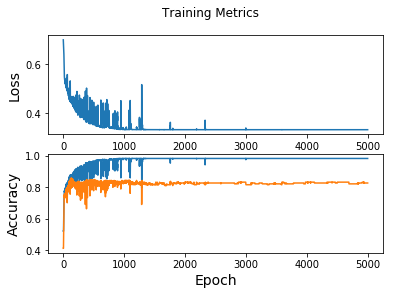

In [37]:
## Note: Rerunning this cell uses the same model variables
train_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

# Initilize the Session
sess = tf.Session()

# Initialize the model's variables
sess.run(tf.global_variables_initializer())

for i in range(5000):
    ### Votre code
    loss_val, accuracy_val = sess.run([loss,accuracy], feed_dict={x: train[0], y: train[1], dropout_prob: 1})
    sess.run(train_op, feed_dict={x: train[0], y: train[1], step: i, dropout_prob: 0.75})
     ### Votre Code
    # On récupère le taux de prédiction sur les données test
    test_accuracy_val = sess.run([accuracy], feed_dict={x: test[0], y: test[1], dropout_prob: 1})[0]

    print(" Epoch :", i," Loss: ", loss_val," Accuracy: ", accuracy_val," Accuracy Test: ",test_accuracy_val)

    train_loss_results.append(loss_val)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)
            
# Plot the evolution of loss and train accuracy
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()

In [38]:
predictions = sess.run([prediction], feed_dict={x: valid[0], dropout_prob: 1.0})[0]### Votre Code
test_accuracy_val = sess.run([accuracy], feed_dict={x: valid[0], y: valid[1], dropout_prob: 1})[0]
print (predictions)
print(valid[1])
print(test_accuracy_val)

[1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0
 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1]
[1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1]
0.8695652
